In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, fcluster, cophenet
from scipy.spatial.distance import pdist

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import sys
sys.setrecursionlimit(10000)

In [2]:
eggnog = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_eggnog.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
pfam = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_pfam.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
kegg = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_kegg.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
kegg_bac = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_kegg.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
kegg_a_b = pd.concat([kegg, kegg_bac], axis=0)

proteins_a = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_clusters.tsv',
            sep='\t')
proteins_b = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_clusters.tsv',
            sep='\t', names=['protein', 'cluster'])

proteins = pd.concat([proteins_a, proteins_b])

proteins.rename(columns={'cluster':'ids'}, inplace=True)

In [3]:
matrix = pd.read_csv('/work/projects/coevolution/phylogeny/smash/bac_VS_arch_common_kegg_ids/out_btw_PFs.csv')
matrix.head()

a_116925.fasta  a_121399.fasta  a_135089.fasta  a_135737.fasta  \
0             1.0             0.0             0.0             0.0   
1             0.0             1.0             0.0             0.0   
2             0.0             0.0             1.0             0.0   
3             0.0             0.0             0.0             1.0   
4             0.0             0.0             0.0             0.0   

   a_147408.fasta  a_151581.fasta  a_159495.fasta  a_18692.fasta  \
0             0.0             0.0             0.0            0.0   
1             0.0             0.0             0.0            0.0   
2             0.0             0.0             0.0            0.0   
3             0.0             0.0             0.0            0.0   
4             1.0             0.0             0.0            0.0   

   a_21044.fasta  a_221921.fasta  ...  b_9878810.fasta  b_9893800.fasta  \
0       0.000000             0.0  ...              0.0              0.0   
1       0.000000             0.0  ...              0.0              0.0   
2       0.000000             0.0  ...              0.0              0.0   
3       0.530086             0.0  ...              0.0              0.0   
4       0.000000             0.0  ...              0.0              0.0   

   b_9916173.fasta  b_9916185.fasta  b_9923638.fasta  b_9928220.fasta  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   b_9949824.fasta  b_9956428.fasta  b_997696.fasta  b_997808.fasta  
0              0.0              0.0             0.0             0.0  
1              0.0              0.0             0.0             0.0  
2              0.0              0.0             0.0             0.0  
3              0.0              0.0             0.0             0.0  
4              0.0              0.0             0.0             0.0  

[5 rows x 535 columns]

In [4]:
labels = matrix.columns
# Perform clustering, you can choose the method
# in this case, we use 'ward'
Z = linkage(matrix)

In [41]:
pd.DataFrame(labels, columns=['ids'])

ids
0     a_116925.fasta
1     a_121399.fasta
2     a_135089.fasta
3     a_135737.fasta
4     a_147408.fasta
..               ...
530  b_9928220.fasta
531  b_9949824.fasta
532  b_9956428.fasta
533   b_997696.fasta
534   b_997808.fasta

[535 rows x 1 columns]

In [43]:
arch = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_common_kegg_ids.tsv',
           header=None, names=['protein', 'cluster'], sep='\t')

In [47]:
arch

protein  cluster
0     GUT_GENOME103991.fasta_782  a_60600
1      GUT_GENOME074072.fasta_78  a_60600
2     GUT_GENOME161846.fasta_170  a_60600
3     GUT_GENOME161057.fasta_907  a_60600
4     GUT_GENOME162792.fasta_580  a_60600
..                           ...      ...
836  GUT_GENOME040406.fasta_1109  a_43431
837  GUT_GENOME040374.fasta_1370  a_43431
838            3300029435_39_603  a_43431
839  GUT_GENOME055714.fasta_1699  a_43431
840  GUT_GENOME115540.fasta_1750  a_43431

[841 rows x 2 columns]

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram (truncated)')

Text(0.5, 0, 'sample index or (cluster simatrixe)')

Text(0, 0.5, 'distance')

{'icoord': [[85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [45.0, 45.0, 64.375, 64.375],
  [35.0, 35.0, 54.6875, 54.6875],
  [25.0, 25.0, 44.84375, 44.84375],
  [15.0, 15.0, 34.921875, 34.921875],
  [5.0, 5.0, 24.9609375, 24.9609375]],
 'dcoord': [[0.0, 1.421018898888076, 1.421018898888076, 0.0],
  [0.0, 1.4215500003646404, 1.4215500003646404, 1.421018898888076],
  [0.0, 1.4249588921510816, 1.4249588921510816, 1.4215500003646404],
  [0.0, 1.4272605900327846, 1.4272605900327846, 1.4249588921510816],
  [0.0, 1.4309256682392673, 1.4309256682392673, 1.4272605900327846],
  [0.0, 1.5367696305723608, 1.5367696305723608, 1.4309256682392673],
  [0.0, 1.5400961008976028, 1.5400961008976028, 1.5367696305723608],
  [0.0, 1.5595997196137872, 1.5595997196137872, 1.5400961008976028],
  [0.0, 1.5712567575380227, 1.5712567575380227, 1.5595997196137872]],
 'ivl': ['(4)',
  '(2)',
  '(4)',
  '(2)',
  '(2)',
  '(3)',
  '(2)',
  '(3)',
  '(

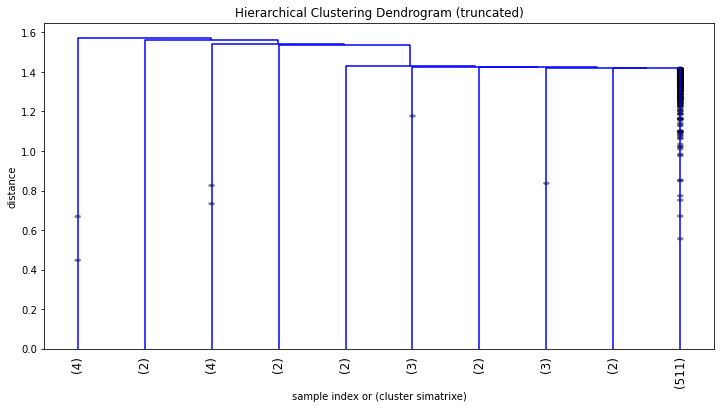

In [5]:
fig = plt.figure(figsize=(12, 6))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster simatrixe)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [6]:
max_d = 1.38

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

Text(0, 0.5, 'sample id')

Text(0.5, 0, 'distance')

([<matplotlib.axis.XTick at 0x2aaf7d0cfcd0>,
 <a list of 33 Text major ticklabel objects>)

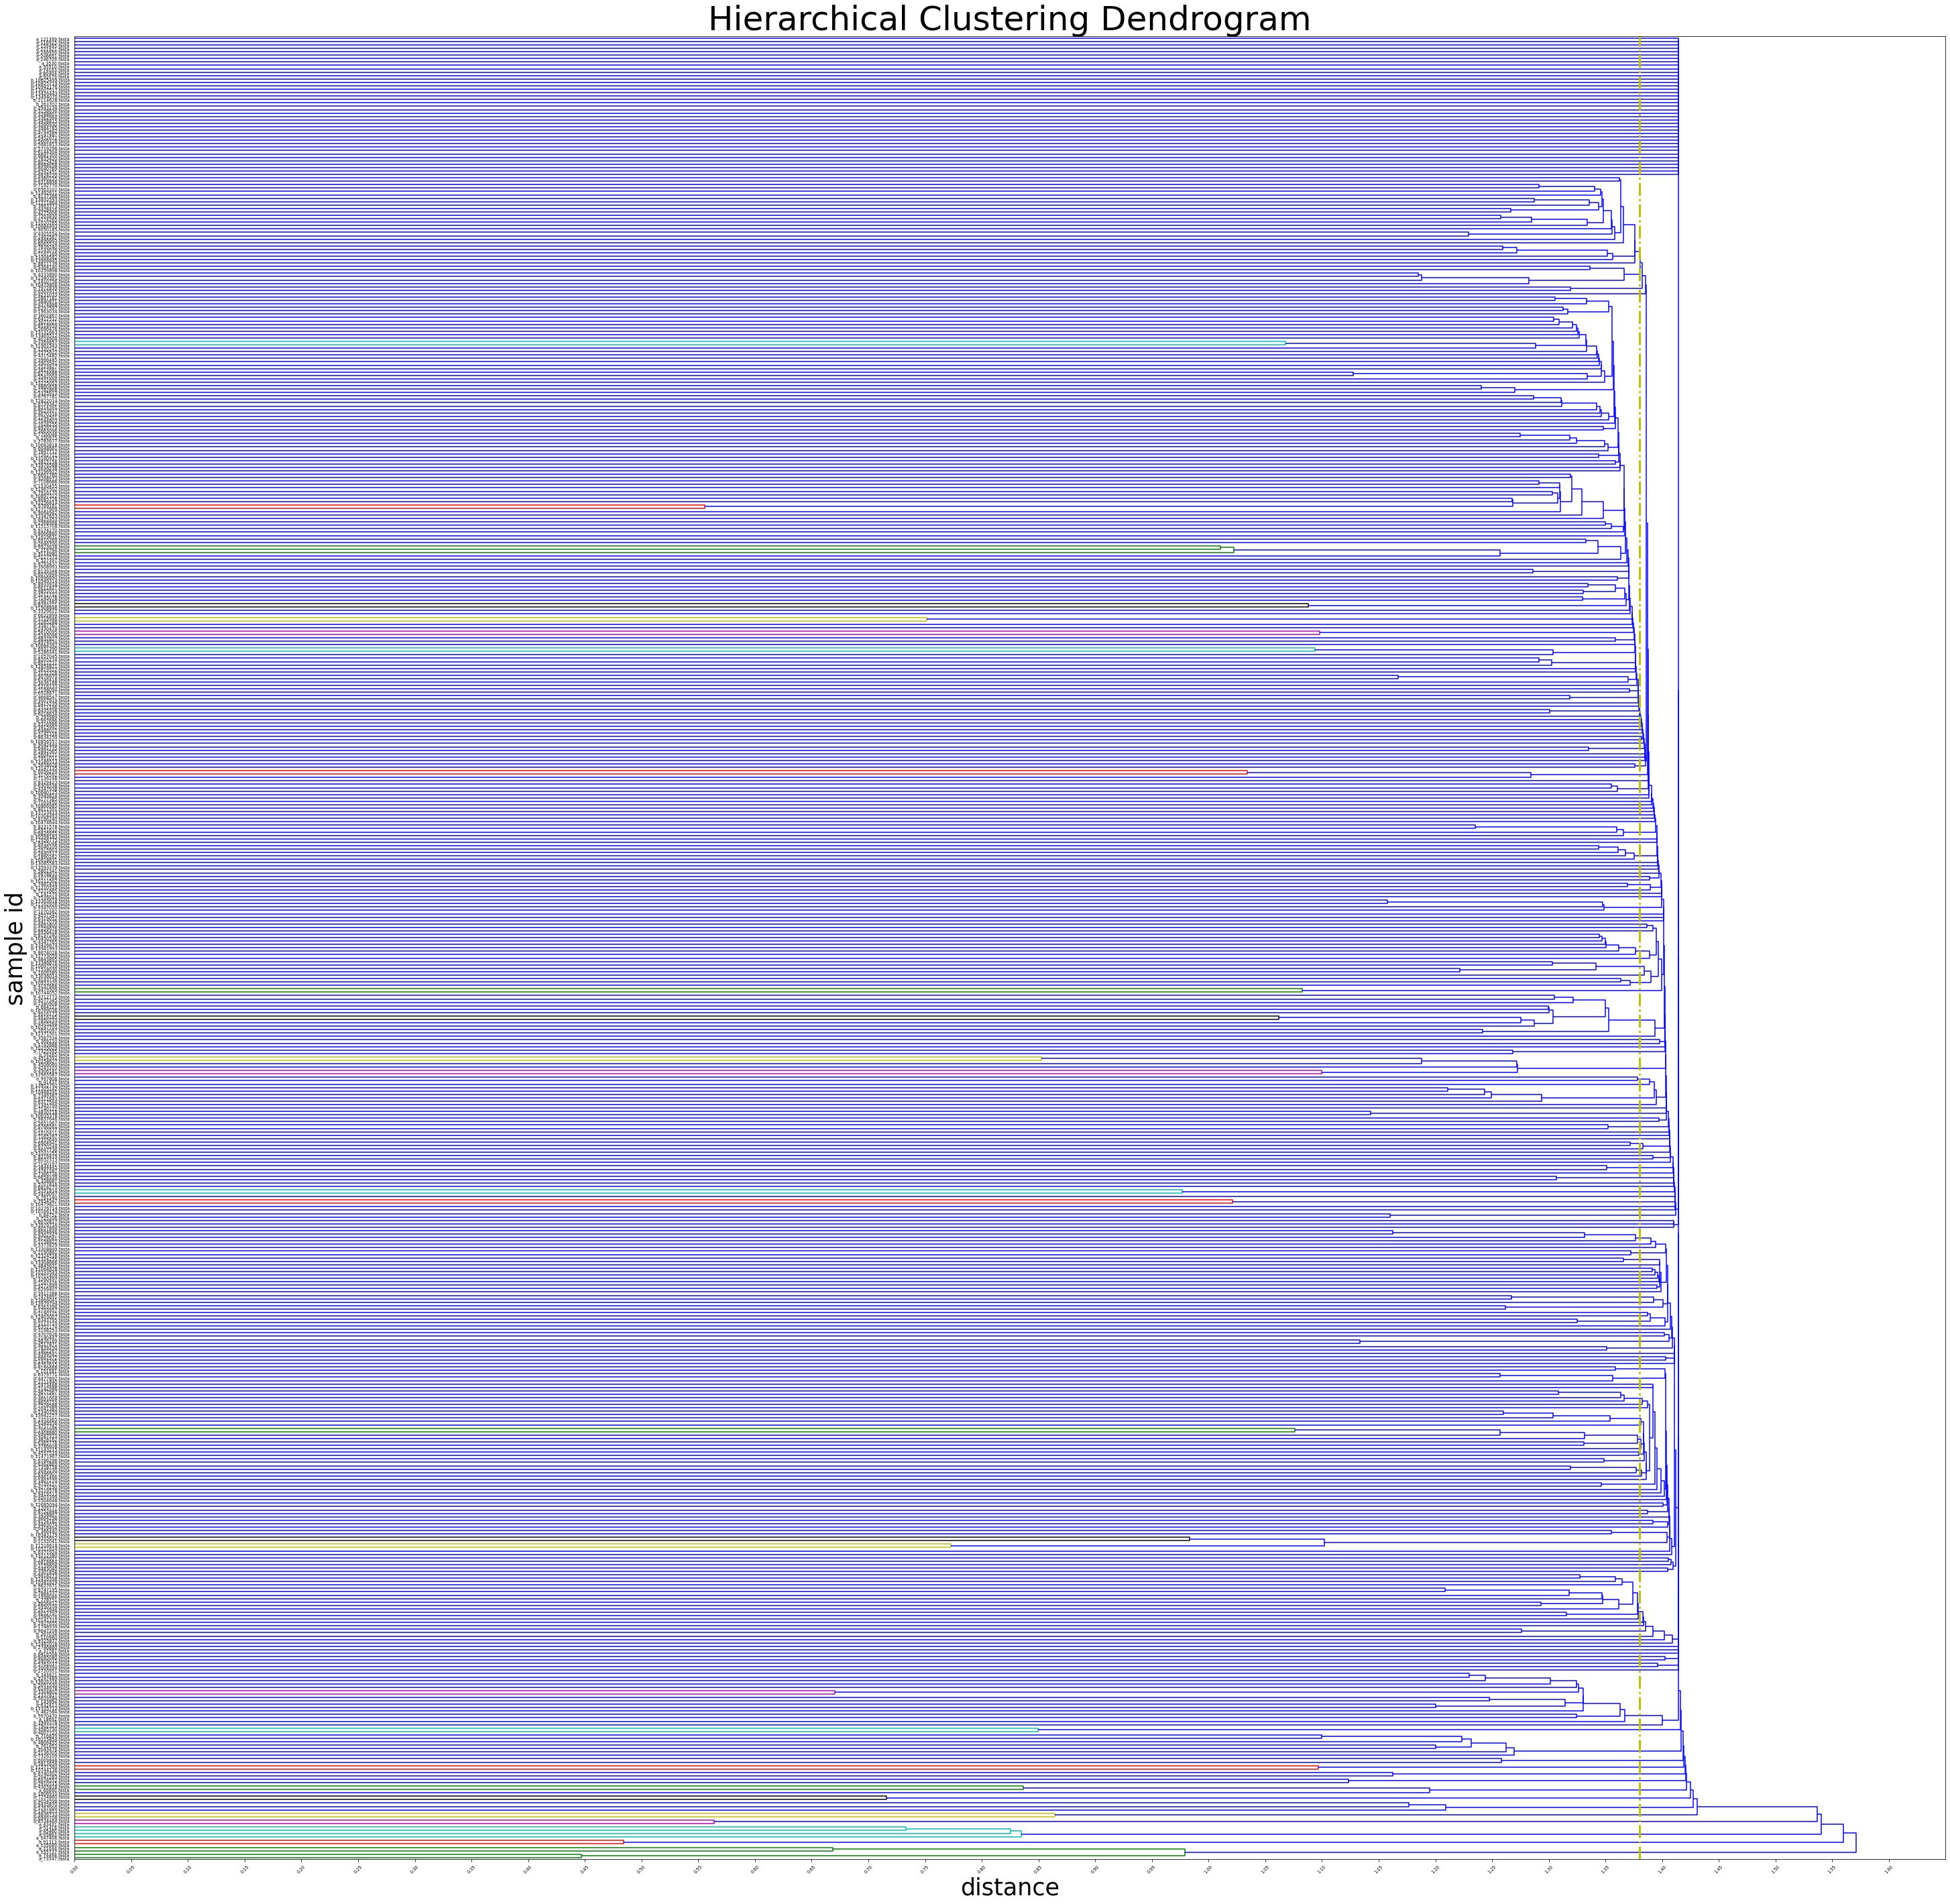

In [7]:
fig = plt.figure(figsize=(50, 50))
dn = dendrogram(Z, 
                orientation='right', 
                labels=labels)
plt.title('Hierarchical Clustering Dendrogram', fontsize=50)
plt.ylabel('sample id', fontsize=35)
plt.xlabel('distance', fontsize=35)
plt.xticks(np.arange(0, 1.65, step=0.05), rotation=45)
plt.tick_params(axis='both', which='major', labelsize=6.5)
plt.plot([max_d,max_d], [max_d, 100000], 'y-.', lw=3) 
# plt.savefig('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pics/dendrogram_1.38.png', 
#             format='png', dpi=150)
plt.show()

In [8]:
fig = plt.figure(figsize=(100, 500))
dn = dendrogram(Z, 
                orientation='right')
plt.xlabel('distance')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
plt.plot([max_d,max_d], [max_d, 100000], 'y-.', lw=1) 
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
# plt.savefig('/work/projects/ecosystem_biology/archaea/analysis/smash/'+dataset+'/dendrogram_'+dataset+'.png', format='png', dpi=150)
plt.show()

Text(0.5, 0, 'distance')

extract related protein groups 

In [9]:
# db = 'kegg'
# ### Loop the data lines
# with open("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_"+db+".tsv", 'r') as temp_f:
#     # get No of columns in each line
#     col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

# ### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
# column_names = [i for i in range(0, max(col_count))]

# ### Read csv
# df = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_'+db+'.tsv', delimiter="\t", names=column_names)
# df.dropna(axis=1, how='all', inplace=True)
# df.columns=['protein', 'id', 'description']
# kegg_bac = df


# ### Loop the data lines
# with open("/work/projects/archaeome/coevolution/kegg_annotation_archaea.tsv", 'r') as temp_f:
#     # get No of columns in each line
#     col_count = [ len(l.split("\t")) for l in temp_f.readlines() ]

# ### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
# column_names = [i for i in range(0, max(col_count))]

# ### Read csv
# df = pd.read_csv("/work/projects/archaeome/coevolution/kegg_annotation_archaea.tsv", delimiter="\t", names=column_names)
# df.dropna(axis=1, how='all', inplace=True)
# df.columns=['protein', 'id', 'description']
# kegg_arch = df.iloc[1:]



# annot = pd.concat([kegg_arch, kegg_bac])



# proteins_a = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_clusters.tsv',
#             sep='\t')
# proteins_b = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_func_relat_clusters.tsv',
#            sep='\t')
# proteins_b['cluster'] = 'b_' + proteins_b['cluster'].astype(str)

# proteins = pd.concat([proteins_a, proteins_b])


# proteins.rename(columns={'cluster':'ids'}, inplace=True)



# proteins_annotated = annot.merge(proteins, on='protein')

In [10]:
max_d = 1.38
clusters = fcluster(Z, max_d, criterion='distance')

clusters = pd.DataFrame(clusters, labels)
clusters.columns = ['cluster']
clusters.reset_index(level=0, inplace=True)
clusters.rename(columns={'index' : 'ids'}, inplace=True)

clusters.ids = clusters.ids.str.rstrip('.fasta')

clusters_count = clusters.groupby('cluster', as_index=False)\
.agg({'ids':'count'})\
.rename(columns={'ids':'count'})\
.sort_values('count', ascending=False)


clusters_count
# clusters.groupby('cluster').agg({'ids':lambda x: list(x)})


# clusters_5plus = clusters_count[clusters_count['count']>=2].merge(clusters, on='cluster')
# clusters_5plus.cluster.nunique()



cluster  count
145      146    123
158      159     26
14        15     15
21        22     14
121      122     12
..       ...    ...
116      117      1
26        27      1
25        26      1
119      120      1
236      237      1

[237 rows x 2 columns]

In [23]:
clusters_count

cluster  count
145      146    123
158      159     26
14        15     15
21        22     14
121      122     12
..       ...    ...
116      117      1
26        27      1
25        26      1
119      120      1
236      237      1

[237 rows x 2 columns]

check how many A and B clusters I have

In [16]:
clusters_count.merge(clusters, on='cluster')

cluster  count         ids
0        146    123  b_10549314
1        146    123   b_1057045
2        146    123  b_10683818
3        146    123  b_10684392
4        146    123  b_10897322
..       ...    ...         ...
530      117      1   b_1345799
531       27      1  b_12482028
532       26      1   b_9325877
533      120      1   b_1745886
534      237      1   b_2720951

[535 rows x 3 columns]

In [24]:
clusters_count.merge(clusters, on='cluster')[clusters_count.merge(clusters, on='cluster')\
                                             .ids.str.startswith('a')].shape

(27, 3)

In [25]:
# count archaeal PFs
tmp_a = clusters_count.merge(clusters, on='cluster').groupby('cluster', as_index=False)\
.agg({'ids':lambda x: x[x.str.startswith('a_')].count()})\
.rename(columns={'ids':'count_a'})

# count bacterial PFs
tmp_b = clusters_count.merge(clusters, on='cluster').groupby('cluster', as_index=False)\
.agg({'ids':lambda x: x[x.str.startswith('b_')].count()})\
.rename(columns={'ids':'count_b'})

# count all
tmp_all = clusters_count.merge(clusters, on='cluster')\
.groupby('cluster', as_index=False)\
.agg({'ids':lambda x: x.count()})\
.rename(columns={'ids':'count'})

In [26]:
pf_counts = pd.concat([tmp_a, tmp_b, tmp_all], axis=1)
pf_counts = pf_counts.loc[:,~pf_counts.columns.duplicated()]
pf_counts

cluster  count_a  count_b  count
0          1        4        0      4
1          2        2        0      2
2          3        4        0      4
3          4        1        1      2
4          5        0        2      2
..       ...      ...      ...    ...
232      233        0        1      1
233      234        0        1      1
234      235        1        0      1
235      236        0        1      1
236      237        0        1      1

[237 rows x 4 columns]

In [27]:
# pf_counts.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/pf_counts.tsv',
#                                     index=None)

In [28]:
pf_counts[pf_counts.count_b == pf_counts['count']].shape

(217, 4)

In [29]:
pf_counts['ratio_a2all'] = pf_counts['count_a']/pf_counts['count']
pf_counts['ratio_b2all'] = pf_counts['count_b']/pf_counts['count']

In [30]:
pf_counts[pf_counts['ratio_a2all']==1].shape, pf_counts[pf_counts['ratio_b2all']==1].shape

((16, 6), (217, 6))

clusters with archaeal PFs:

In [31]:
pf_counts[pf_counts['ratio_a2all']>0].shape

(20, 6)

In [33]:
pf_counts

cluster  count_a  count_b  count  ratio_a2all  ratio_b2all
0          1        4        0      4          1.0          0.0
1          2        2        0      2          1.0          0.0
2          3        4        0      4          1.0          0.0
3          4        1        1      2          0.5          0.5
4          5        0        2      2          0.0          1.0
..       ...      ...      ...    ...          ...          ...
232      233        0        1      1          0.0          1.0
233      234        0        1      1          0.0          1.0
234      235        1        0      1          1.0          0.0
235      236        0        1      1          0.0          1.0
236      237        0        1      1          0.0          1.0

[237 rows x 6 columns]

In [32]:
pf_counts\
.merge(clusters)\
.merge(proteins[['ids', 'protein']], on='ids')\
.merge(kegg_a_b, on='protein')
# .to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/all_clusters_dendrogram.tsv',
#                                     index=None)

cluster  count_a  count_b  count  ratio_a2all  ratio_b2all        ids  \
0            1        4        0      4          1.0          0.0   a_135737   
1            1        4        0      4          1.0          0.0   a_135737   
2            1        4        0      4          1.0          0.0   a_135737   
3            1        4        0      4          1.0          0.0   a_135737   
4            1        4        0      4          1.0          0.0   a_135737   
...        ...      ...      ...    ...          ...          ...        ...   
23490      237        0        1      1          0.0          1.0  b_2720951   
23491      237        0        1      1          0.0          1.0  b_2720951   
23492      237        0        1      1          0.0          1.0  b_2720951   
23493      237        0        1      1          0.0          1.0  b_2720951   
23494      237        0        1      1          0.0          1.0  b_2720951   

                          protein      id  \
0      GUT_GENOME139173.fasta_357  K12706   
1      GUT_GENOME105868.fasta_196  K12706   
2      GUT_GENOME104819.fasta_673  K12706   
3      GUT_GENOME048336.fasta_939  K12706   
4      GUT_GENOME280278.fasta_484  K12706   
...                           ...     ...   
23490      GUT_GENOME067112_173_2  K19082   
23491          3300007222_23_1011  K19082   
23492          3300007222_23_1011  K19082   
23493       GUT_GENOME004370_71_6  K19082   
23494       GUT_GENOME004370_71_6  K19082   

                                             description  
0                   novobiocin biosynthesis protein NovC  
1                   novobiocin biosynthesis protein NovC  
2                   novobiocin biosynthesis protein NovC  
3                   novobiocin biosynthesis protein NovC  
4                   novobiocin biosynthesis protein NovC  
...                                                  ...  
23490  two-component system, OmpR family, response re...  
23491  two-component system, OmpR family, response re...  
23492  two-component system, OmpR family, response re...  
23493  two-component system, OmpR family, response re...  
23494  two-component system, OmpR family, response re...  

[23495 rows x 10 columns]

extract homogenuous archaeal and bacterial clusters:

In [21]:
homogenuous_clusters_archaea = pf_counts[pf_counts['ratio_a2all']==1]\
.merge(clusters)\
.merge(proteins[['ids', 'protein']], on='ids')\
.merge(kegg_a_b, on='protein')

homogenuous_clusters_bacteria = pf_counts[pf_counts['ratio_b2all']==1]\
.merge(clusters)\
.merge(proteins[['ids', 'protein']], on='ids')\
.merge(kegg_a_b, on='protein')

In [22]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [23]:
homogenuous_clusters_archaea\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'protein_count'})\
.merge(pf_counts, on='cluster')[['cluster', 'id', 'description', 'count_a', 'protein_count']]

cluster      id                                        description  \
0         1  K09909                            uncharacterized protein   
1         1  K12706               novobiocin biosynthesis protein NovC   
2         2  K16195  eukaryotic translation initiation factor 2-alp...   
3         3  K14495                                 F-box protein GID2   
4       193  K22554                 acyl-coenzyme A thioesterase THEM5   
5       194  K24356                            collagen type XXV alpha   
6       195  K02369    alpha-1,4-N-acetylglucosaminyltransferase EXTL2   
7       196  K17633                       RAS protein activator-like 2   
8       196  K21691                resuscitation-promoting factor RpfE   
9       197  K05615  solute carrier family 1 (neutral amino acid tr...   
10      198  K15198          transcription factor TFIIIB component B''   
11      199  K13546                    2-deoxy-scyllo-inosose synthase   
12      200  K11234                      mating pheromone alpha-factor   
13      201  K16158       methane monooxygenase component A beta chain   
14      202  K10742        DNA replication ATP-dependent helicase Dna2   
15      202  K19036             ATP-dependent RNA/DNA helicase IGHMBP2   
16      202  K23498                       peptide chain release factor   
17      203  K19543               aminoglycoside 3'-phosphotransferase   
18      204  K01086  fructose-1,6-bisphosphatase I / sedoheptulose-...   
19      235  K10436       microtubule-associated protein, RP/EB family   

    count_a  protein_count  
0         4              5  
1         4             48  
2         2             15  
3         4            377  
4         1              7  
5         1              5  
6         1             38  
7         1              3  
8         1              5  
9         1              5  
10        1              5  
11        1              7  
12        1            153  
13        1              7  
14        1             10  
15        1             10  
16        1             10  
17        1             25  
18        1              7  
19        1             94

In [24]:
# homogenuous_clusters_archaea.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/homogenuous_clusters_archaea.tsv',
#                                     index=None)

In [25]:
homogenuous_clusters_archaea[homogenuous_clusters_archaea.cluster == 204 ].description.unique()

array(['fructose-1,6-bisphosphatase I / sedoheptulose-1,7-bisphosphatase'],
      dtype=object)

In [26]:
homogenuous_clusters_bacteria\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.rename(columns={'protein':'protein_count'})\
.merge(pf_counts, on='cluster')[['cluster', 'id', 'description', 'count_b', 'protein_count']]

cluster      id                                        description  \
0          5  K19082  two-component system, OmpR family, response re...   
1          6  K23498                       peptide chain release factor   
2          7  K19082  two-component system, OmpR family, response re...   
3          9  K17465          D-glucosaminate PTS system EIIB component   
4         10  K19082  two-component system, OmpR family, response re...   
..       ...     ...                                                ...   
247      233  K18987  two-component system, OmpR family, response re...   
248      233  K19082  two-component system, OmpR family, response re...   
249      234  K19082  two-component system, OmpR family, response re...   
250      236  K17465          D-glucosaminate PTS system EIIB component   
251      237  K19082  two-component system, OmpR family, response re...   

     count_b  protein_count  
0          2             61  
1          3            489  
2          2             82  
3          2             92  
4          2             71  
..       ...            ...  
247        1             12  
248        1             15  
249        1             50  
250        1             27  
251        1             20  

[252 rows x 5 columns]

In [27]:
# homogenuous_clusters_bacteria.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/homogenuous_clusters_bacteria.tsv',
#                                     index=None)

Save to create protein families:

In [28]:
homogenuous_clusters_archaea[['protein', 'cluster']]

protein  cluster
0     GUT_GENOME139173.fasta_357        1
1     GUT_GENOME105868.fasta_196        1
2     GUT_GENOME104819.fasta_673        1
3     GUT_GENOME048336.fasta_939        1
4     GUT_GENOME280278.fasta_484        1
..                           ...      ...
831  GUT_GENOME273866.fasta_1312      235
832   GUT_GENOME244876.fasta_571      235
833  GUT_GENOME093215.fasta_1369      235
834   GUT_GENOME024578.fasta_508      235
835  GUT_GENOME018729.fasta_1321      235

[836 rows x 2 columns]

In [29]:
# homogenuous_clusters_archaea[['cluster', 'ids', 'protein']]\
# .to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/to_check_above_1.tsv',
# index=None)

In [30]:
# homogenuous_clusters_bacteria[['protein', 'cluster']]\
# .to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_homogenuous_clusters_bacteria_smash.tsv',
#        sep='\t', header=None, index=None)

## This piece of code is applicable to when i'm looking to not onle the most distant clusters (where 4 and 5 etc are)

In [31]:
clusters_count[clusters_count['count']!=1]

cluster  count
145      146    123
158      159     26
14        15     15
21        22     14
121      122     12
..       ...    ...
13        14      2
9         10      2
20        21      2
8          9      2
33        34      2

[65 rows x 2 columns]

👆65 groups of protein families

In [32]:
candidates = clusters_count[clusters_count['count']!=1][['cluster']].merge(clusters, on='cluster')
candidates

cluster         ids
0        146  b_10549314
1        146   b_1057045
2        146  b_10683818
3        146  b_10684392
4        146  b_10897322
..       ...         ...
358       21   b_9647208
359        9   b_2910515
360        9   b_6028552
361       34  b_10343179
362       34    b_366440

[363 rows x 2 columns]

In [33]:
# count archaeal PFs
tmp_a = candidates.groupby('cluster', as_index=False)\
.agg({'ids':lambda x: x[x.str.startswith('a_')].count()})\
.rename(columns={'ids':'count_a'})

# count bacterial PFs
tmp_b = candidates.groupby('cluster', as_index=False)\
.agg({'ids':lambda x: x[x.str.startswith('b_')].count()})\
.rename(columns={'ids':'count_b'})

# count all
tmp_all = candidates\
.groupby('cluster', as_index=False)\
.agg({'ids':lambda x: x.count()})\
.rename(columns={'ids':'count'})

In [34]:
pf_counts = pd.concat([tmp_a, tmp_b, tmp_all], axis=1)
pf_counts = pf_counts.loc[:,~pf_counts.columns.duplicated()]
pf_counts

cluster  count_a  count_b  count
0         1        4        0      4
1         2        2        0      2
2         3        4        0      4
3         4        1        1      2
4         5        0        2      2
..      ...      ...      ...    ...
60      143        0        2      2
61      146        0      123    123
62      157        0        2      2
63      158        0        6      6
64      159        0       26     26

[65 rows x 4 columns]

these are candidate heterogenic clusters: 

In [35]:
pf_counts_hetero = pf_counts[~((pf_counts.count_b == 0) | (pf_counts.count_a == 0))]
pf_counts_hetero

cluster  count_a  count_b  count
3         4        1        1      2
7         8        1        2      3
14       15        1       14     15
27       61        1        1      2

In [36]:
candidates_hetero = candidates.merge(pf_counts_hetero.cluster)
candidates_hetero

cluster         ids
0        15     a_18692
1        15  b_11335712
2        15  b_13626316
3        15    b_143894
4        15   b_2297489
5        15   b_2337817
6        15   b_3304802
7        15   b_3349378
8        15    b_343821
9        15    b_482584
10       15   b_5091930
11       15   b_5629584
12       15   b_5970470
13       15   b_6244978
14       15    b_632413
15        8     a_60600
16        8   b_1006910
17        8   b_4305818
18       61    a_151581
19       61   b_9199668
20        4     a_43431
21        4   b_8534464

annotate them

In [37]:
# eggnog = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_eggnog.tsv", 
#             delimiter="\t", header=None, names=['protein', 'id', 'description'])
# pfam = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_pfam.tsv", 
#             delimiter="\t", header=None, names=['protein', 'id', 'description'])
kegg = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/archaea/archaea_annot_kegg.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
kegg_bac = pd.read_csv("/work/projects/ecosystem_biology/archaea/coevolution/analysis/mantis/bacteria/bacteria_annot_kegg.tsv", 
            delimiter="\t", header=None, names=['protein', 'id', 'description'])
kegg_a_b = pd.concat([kegg, kegg_bac], axis=0)

proteins_a = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_arch_GU_clusters.tsv',
            sep='\t')
proteins_b = pd.read_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_bac_clusters.tsv',
            sep='\t', names=['protein', 'cluster'])

proteins = pd.concat([proteins_a, proteins_b])

proteins.rename(columns={'cluster':'ids'}, inplace=True)

In [38]:
candidates_hetero_annot = candidates_hetero.merge(proteins[['ids', 'protein']]).merge(kegg_a_b, on='protein')

candidates_hetero_annot

cluster        ids                      protein      id  \
0          15    a_18692   GUT_GENOME068480.fasta_744  K09469   
1          15    a_18692  GUT_GENOME267332.fasta_1526  K09469   
2          15    a_18692    GUT_GENOME257522.fasta_13  K09469   
3          15    a_18692   GUT_GENOME090851.fasta_340  K09469   
4          15    a_18692   GUT_GENOME064456.fasta_642  K09469   
...       ...        ...                          ...     ...   
1245        4  b_8534464            3300029103_13_853  K19481   
1246        4  b_8534464            3300029103_13_853  K19481   
1247        4  b_8534464        GUT_GENOME117933_50_2  K19481   
1248        4  b_8534464        GUT_GENOME071091_90_2  K19481   
1249        4  b_8534464         GUT_GENOME233766_1_6  K19481   

                                        description  
0     2-aminoethylphosphonate-pyruvate transaminase  
1     2-aminoethylphosphonate-pyruvate transaminase  
2     2-aminoethylphosphonate-pyruvate transaminase  
3     2-aminoethylphosphonate-pyruvate transaminase  
4     2-aminoethylphosphonate-pyruvate transaminase  
...                                             ...  
1245                             matrix Gla protein  
1246                             matrix Gla protein  
1247                             matrix Gla protein  
1248                             matrix Gla protein  
1249                             matrix Gla protein  

[1250 rows x 5 columns]

In [41]:
candidates_hetero.merge(proteins[['ids', 'protein']]).to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_common_kegg_ids__kegg_groups_AB.tsv',
       index=None)

In [33]:
candidates_hetero_annot\
.groupby(['cluster', 'id', 'description'], as_index=False)\
.agg({'protein':'count'})\
.merge(pf_counts_hetero, on='cluster')[['cluster', 'id', 'description', 'count_a', 'count_b', 'count']]

cluster      id                                        description  \
0        4  K19481                                 matrix Gla protein   
1        8  K19082  two-component system, OmpR family, response re...   
2       15  K09469      2-aminoethylphosphonate-pyruvate transaminase   
3       61  K17465          D-glucosaminate PTS system EIIB component   

   count_a  count_b  count  
0        1        1      2  
1        1        2      3  
2        1       14     15  
3        1        1      2

So, i've got 4 groups 👆:
- matrix Gla protein
- two-component system, OmpR family, response regulator protein BraR/BceR
- 2-aminoethylphosphonate-pyruvate transaminase	
- D-glucosaminate PTS system EIIB component	

- cluster 4 : 1 bacterial PF (18 proteins) + 1 archaeal PF (7 proteins) 
- cluster 8 : 2 bacterial PFs (317 proteins) + 1 archaeal PF (8 proteins) 
- cluster 15 : 14 bacterial PFs (454 proteins) + 1 archaeal PF (12 proteins) 
- cluster 61 : 1 bacterial PF (12 proteins) + 1 archaeal PF (6 proteins) 

In [34]:
to_check_above = candidates_hetero.merge(proteins[['ids', 'protein']], on='ids')

In [35]:
# to_check_above.to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/to_check_above.tsv',
#        index=None)

In [36]:
to_check_above[to_check_above.cluster==8]

cluster        ids                     protein
466        8    a_60600  GUT_GENOME103991.fasta_782
467        8    a_60600   GUT_GENOME074072.fasta_78
468        8    a_60600  GUT_GENOME161846.fasta_170
469        8    a_60600  GUT_GENOME161057.fasta_907
470        8    a_60600  GUT_GENOME162792.fasta_580
..       ...        ...                         ...
786        8  b_4305818        GUT_GENOME000334_1_9
787        8  b_4305818       GUT_GENOME001662_41_2
788        8  b_4305818       GUT_GENOME070792_19_3
789        8  b_4305818       GUT_GENOME086989_32_2
790        8  b_4305818       GUT_GENOME193309_12_6

[325 rows x 3 columns]

In [37]:
to_check_above[to_check_above.cluster == 4]\
.groupby('cluster', as_index=False)\
.agg({'ids':lambda x: x[x.str.startswith('b')].count()})

cluster  ids
0        4   18

In [38]:
to_check_above[to_check_above.cluster == 4]\
.groupby('cluster', as_index=False)\
.agg({'ids':lambda x: x[x.str.startswith('a')].count()})

cluster  ids
0        4    7

In [39]:
# candidates_hetero_annot[candidates_hetero_annot.cluster == 8]\
# .groupby('cluster', as_index=False)\
# .agg({'ids':lambda x: x[x.str.startswith('b')].count()})

?here candidates_hetero_annot may have more proteins, as they have multiple annotations per 1 protein?

extract proteins to make protein families:

In [40]:
# candidates_hetero[candidates_hetero.cluster!=61].merge(proteins[['ids', 'protein']])[['protein', 'cluster']]\
# .to_csv('/work/projects/ecosystem_biology/archaea/coevolution/analysis/intermediate_results/instructions_candidate_homologs_smash.tsv',
#        sep='\t', header=None, index=None)

In [41]:
candidates_hetero[(candidates_hetero.cluster==8) & (candidates_hetero.ids.str.startswith("a"))]\
[['ids']]\
.merge(proteins)

ids                      protein
0  a_60600   GUT_GENOME103991.fasta_782
1  a_60600    GUT_GENOME074072.fasta_78
2  a_60600   GUT_GENOME161846.fasta_170
3  a_60600   GUT_GENOME161057.fasta_907
4  a_60600   GUT_GENOME162792.fasta_580
5  a_60600   GUT_GENOME160444.fasta_894
6  a_60600   GUT_GENOME247693.fasta_381
7  a_60600  GUT_GENOME160229.fasta_1263

In [42]:
candidates_hetero[(candidates_hetero.cluster==4) & (candidates_hetero.ids.str.startswith("a"))][['ids']]\
.merge(proteins)

ids                      protein
0  a_43431   GUT_GENOME040387.fasta_509
1  a_43431  GUT_GENOME247693.fasta_1585
2  a_43431  GUT_GENOME040406.fasta_1109
3  a_43431  GUT_GENOME040374.fasta_1370
4  a_43431            3300029435_39_603
5  a_43431  GUT_GENOME055714.fasta_1699
6  a_43431  GUT_GENOME115540.fasta_1750